In [ ]:
#xgboost
# https://www.kaggle.com/code/shramanabhattacharya/eda-sales-prediction-using-xgboost

In [1]:
import numpy as np
import pandas as pd

from calendar import monthrange

import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os.path

In [4]:
holidays=pd.read_csv('holidays_events.csv')
oil=pd.read_csv('oil.csv')
stores=pd.read_csv('stores.csv')
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')
transactions=pd.read_csv('transactions.csv')

In [5]:
test1=pd.read_csv('test.csv') #creating another copy of test data which will be used later.


In [6]:
stores.shape

(54, 5)

In [7]:
m1=pd.merge(holidays,oil)
m2=pd.merge(train,stores)
m3=pd.merge(m2,transactions)
df=pd.merge(m3,m1,on="date")

In [8]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,type_y,locale,locale_name,description,transferred,dcoilwtico
0,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
1,73063,2013-02-11,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
2,73064,2013-02-11,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
3,73065,2013-02-11,1,BEVERAGES,172.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
4,73066,2013-02-11,1,BOOKS,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01


In [9]:
df.shape

(322047, 17)

In [10]:
df.describe()

,id,store_nbr,sales,onpromotion,cluster,transactions,dcoilwtico
count,3.220470e+05,322047.000000,322047.000000,322047.000000,322047.000000,322047.000000,300003.000000
mean,1.682979e+06,26.994672,406.383452,3.727136,8.531202,1734.117840,64.077912
std,7.862493e+05,15.595174,1246.881240,15.512095,4.713809,1050.335018,25.147682
min,5.610000e+02,1.000000,0.000000,0.000000,1.000000,54.000000,27.960000
25%,1.010616e+06,13.000000,1.000000,0.000000,4.000000,1030.000000,44.660000
50%,1.842406e+06,27.000000,19.000000,0.000000,9.000000,1409.000000,51.440000
75%,2.209556e+06,40.000000,241.260505,1.000000,13.000000,2148.000000,94.740000
max,3.000887e+06,54.000000,124717.000000,716.000000,17.000000,8359.000000,107.950000


In [11]:
df.loc[(df.dcoilwtico.isnull()),'dcoilwtico']=df.dcoilwtico.mean()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322047 entries, 0 to 322046
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            322047 non-null  int64  
 1   date          322047 non-null  object 
 2   store_nbr     322047 non-null  int64  
 3   family        322047 non-null  object 
 4   sales         322047 non-null  float64
 5   onpromotion   322047 non-null  int64  
 6   city          322047 non-null  object 
 7   state         322047 non-null  object 
 8   type_x        322047 non-null  object 
 9   cluster       322047 non-null  int64  
 10  transactions  322047 non-null  int64  
 11  type_y        322047 non-null  object 
 12  locale        322047 non-null  object 
 13  locale_name   322047 non-null  object 
 14  description   322047 non-null  object 
 15  transferred   322047 non-null  bool   
 16  dcoilwtico    322047 non-null  float64
dtypes: bool(1), float64(2), int64(5), object(9)
memo

In [13]:
#Converting the date column from string to datetime dtype.
from datetime import datetime
df['new_date']=pd.to_datetime(df['date'],format='%Y-%m-%d',errors='coerce')

<AxesSubplot:xlabel='new_date', ylabel='sales'>

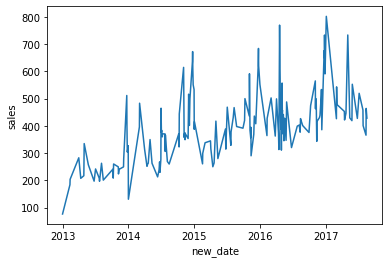

In [14]:
#Time Series plot of the sales data
sns.lineplot(x='new_date',y='sales',data=df,ci=None,estimator='mean')

In [15]:
df[["year", "month", "day"]] = df["date"].str.split("-", expand = True)


df['month'].replace(['01','02','03','04','05','06','07','08','09','10','11','12'],['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'],inplace=True)
df['month'] = pd.Categorical(df['month'],
                                   categories=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'],
                                   ordered=True)
df['day'] = pd.Categorical(df['day'],categories=['01','02','03','04','05','06','07','08','09','10','11', '12', '14','15','16','17','18','19','20','21','22','23', '24', '25', '26', '27','28','29','30','31'],ordered=True)
        

<AxesSubplot:xlabel='month', ylabel='sales'>

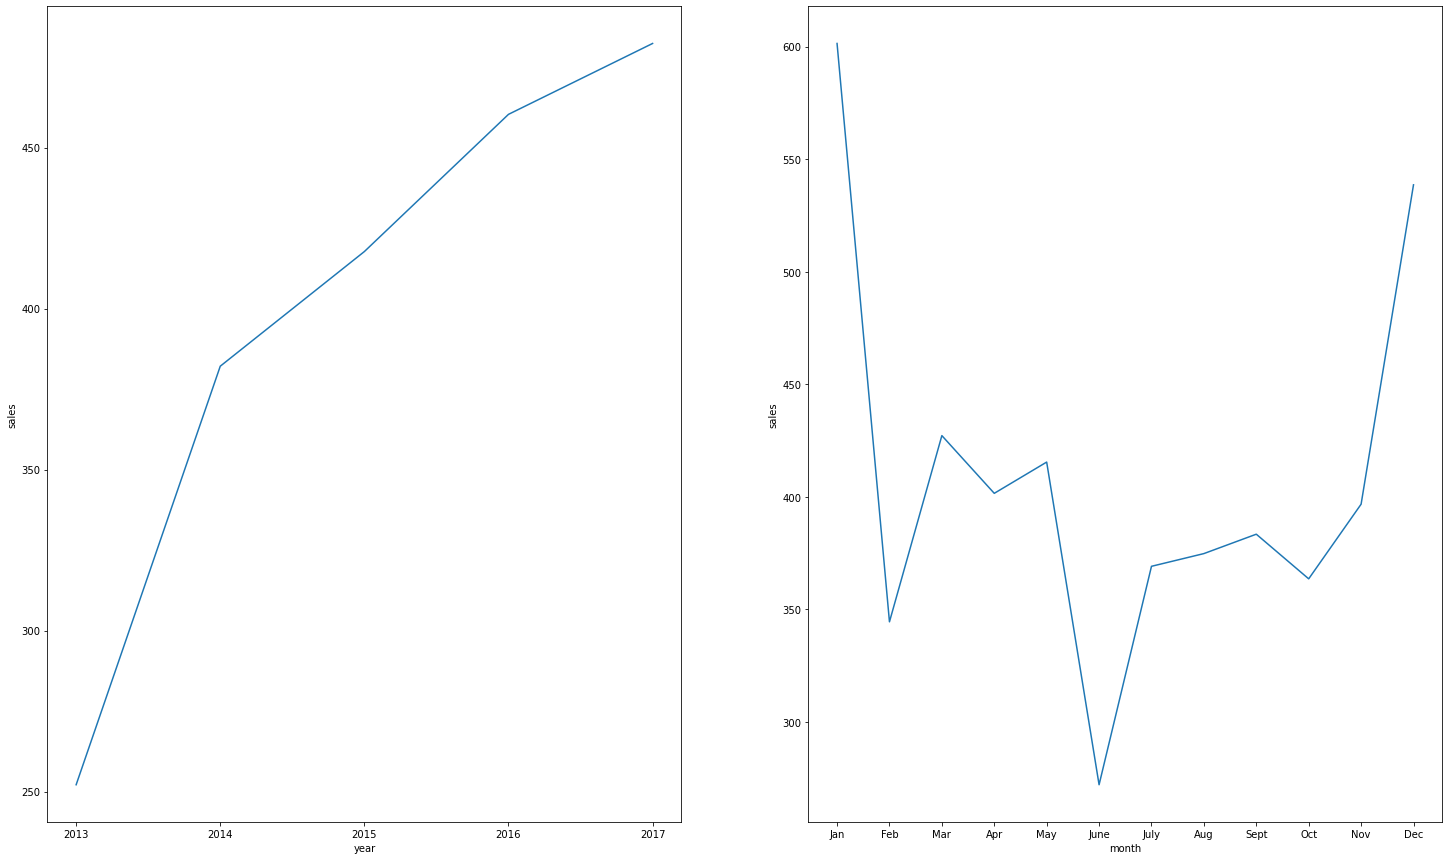

In [16]:
#plotting the monthwise sales trend
f,ax=plt.subplots(1,2,figsize=(25,15))
sns.lineplot(x='year',y='sales',data=df,ci=None,estimator='mean',ax=ax[0])
sns.lineplot(x='month',y='sales',data=df,ci=None,estimator='mean',ax=ax[1])

In [17]:
df['family'].nunique()

33

In [18]:
df['family'].replace(['AUTOMOTIVE', 'HARDWARE', 'LAWN AND GARDEN', 'PLAYERS AND ELECTRONICS'], 'Tools', inplace = True)
df['family'].replace(['BEAUTY', 'LINGERIE', 'LADIESWEAR','PERSONAL CARE','CELEBRATION','MAGAZINES','BOOKS', 'BABY CARE'], 'LifeStyle', inplace = True)
df['family'].replace(['HOME APPLIANCES','HOME AND KITCHEN I', 'HOME AND KITCHEN II','HOME CARE','SCHOOL AND OFFICE SUPPLIES'], 'Home', inplace=True)
df['family'].replace([ 'GROCERY II', 'PET SUPPLIES','SEAFOOD','LIQUOR,WINE,BEER'], 'Food', inplace=True)
df['family'].replace(['DELI', 'EGGS'], 'Daily', inplace=True)

In [19]:

train['family'].replace(['AUTOMOTIVE', 'HARDWARE', 'LAWN AND GARDEN', 'PLAYERS AND ELECTRONICS'], 'Tools', inplace = True)
train['family'].replace(['BEAUTY', 'LINGERIE', 'LADIESWEAR','PERSONAL CARE','CELEBRATION','MAGAZINES','BOOKS', 'BABY CARE'], 'LifeStyle', inplace = True)
train['family'].replace(['HOME APPLIANCES','HOME AND KITCHEN I', 'HOME AND KITCHEN II','HOME CARE','SCHOOL AND OFFICE SUPPLIES'], 'Home', inplace=True)
train['family'].replace([ 'GROCERY II', 'PET SUPPLIES','SEAFOOD','LIQUOR,WINE,BEER'], 'Food', inplace=True)
train['family'].replace(['DELI', 'EGGS'], 'Daily', inplace=True)

test['family'].replace(['AUTOMOTIVE', 'HARDWARE', 'LAWN AND GARDEN', 'PLAYERS AND ELECTRONICS'], 'Tools', inplace = True)
test['family'].replace(['BEAUTY', 'LINGERIE', 'LADIESWEAR','PERSONAL CARE','CELEBRATION','MAGAZINES','BOOKS', 'BABY CARE'], 'LifeStyle', inplace = True)
test['family'].replace(['HOME APPLIANCES','HOME AND KITCHEN I', 'HOME AND KITCHEN II','HOME CARE','SCHOOL AND OFFICE SUPPLIES'], 'Home', inplace=True)
test['family'].replace([ 'GROCERY II', 'PET SUPPLIES','SEAFOOD','LIQUOR,WINE,BEER'], 'Food', inplace=True)
test['family'].replace(['DELI', 'EGGS'], 'Daily', inplace=True)

<AxesSubplot:xlabel='sales', ylabel='family'>

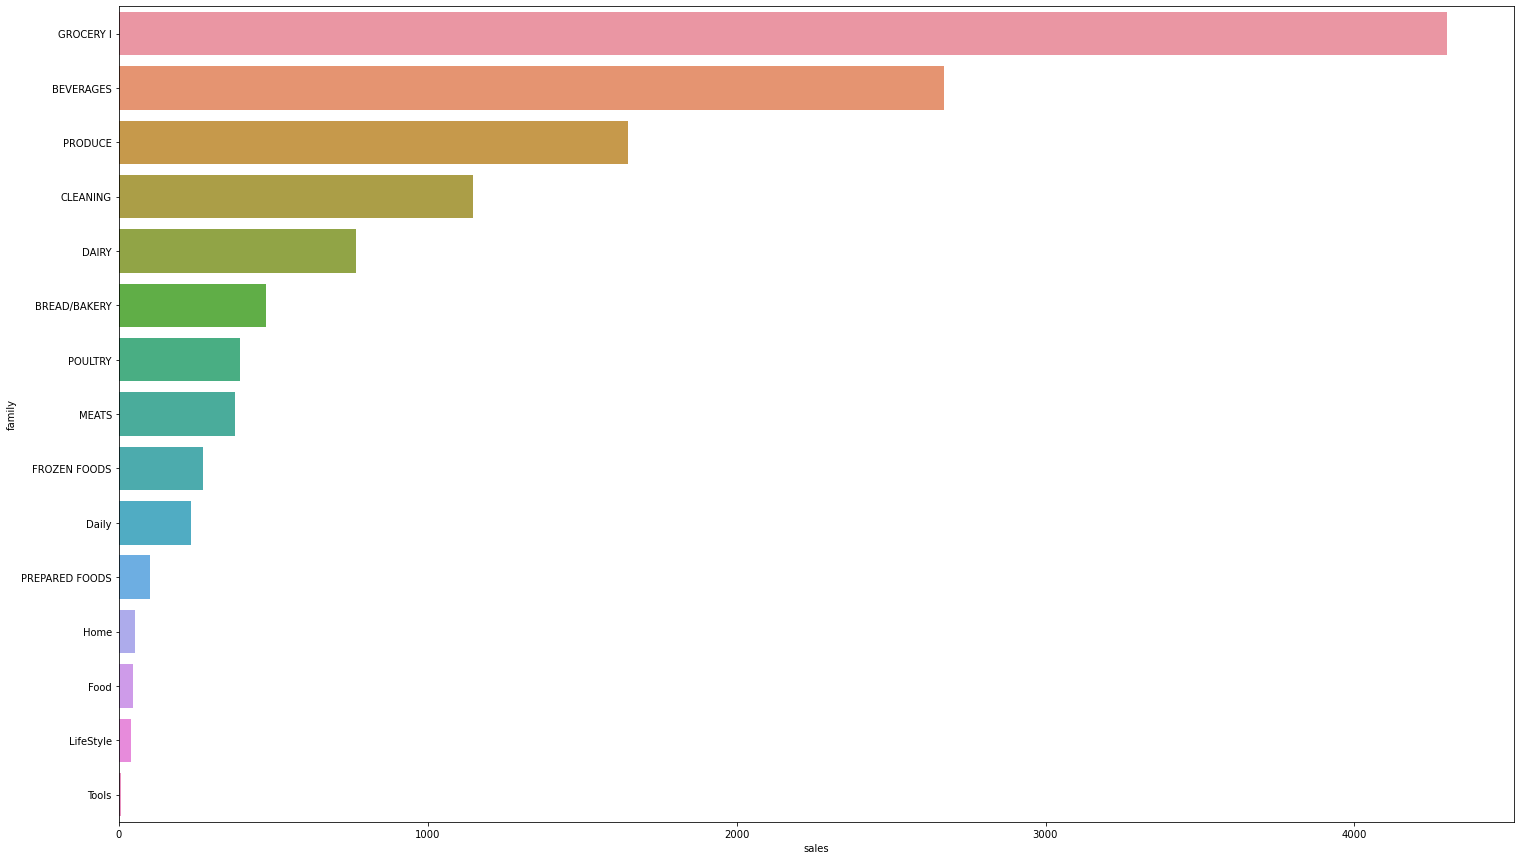

In [20]:
#Plotting the sales using bar-plot w.r.t to 'family' categories.

d=df.groupby('family')['sales'].mean().sort_values(ascending=False)
d=pd.DataFrame(d)
df.sales= pd.to_numeric(df.sales, errors='coerce')
ax,f=plt.subplots(figsize=(25,15))
sns.barplot(x='sales',y=d.index,data=d,ax=None,ci=None)

<AxesSubplot:xlabel='store_nbr', ylabel='sales'>

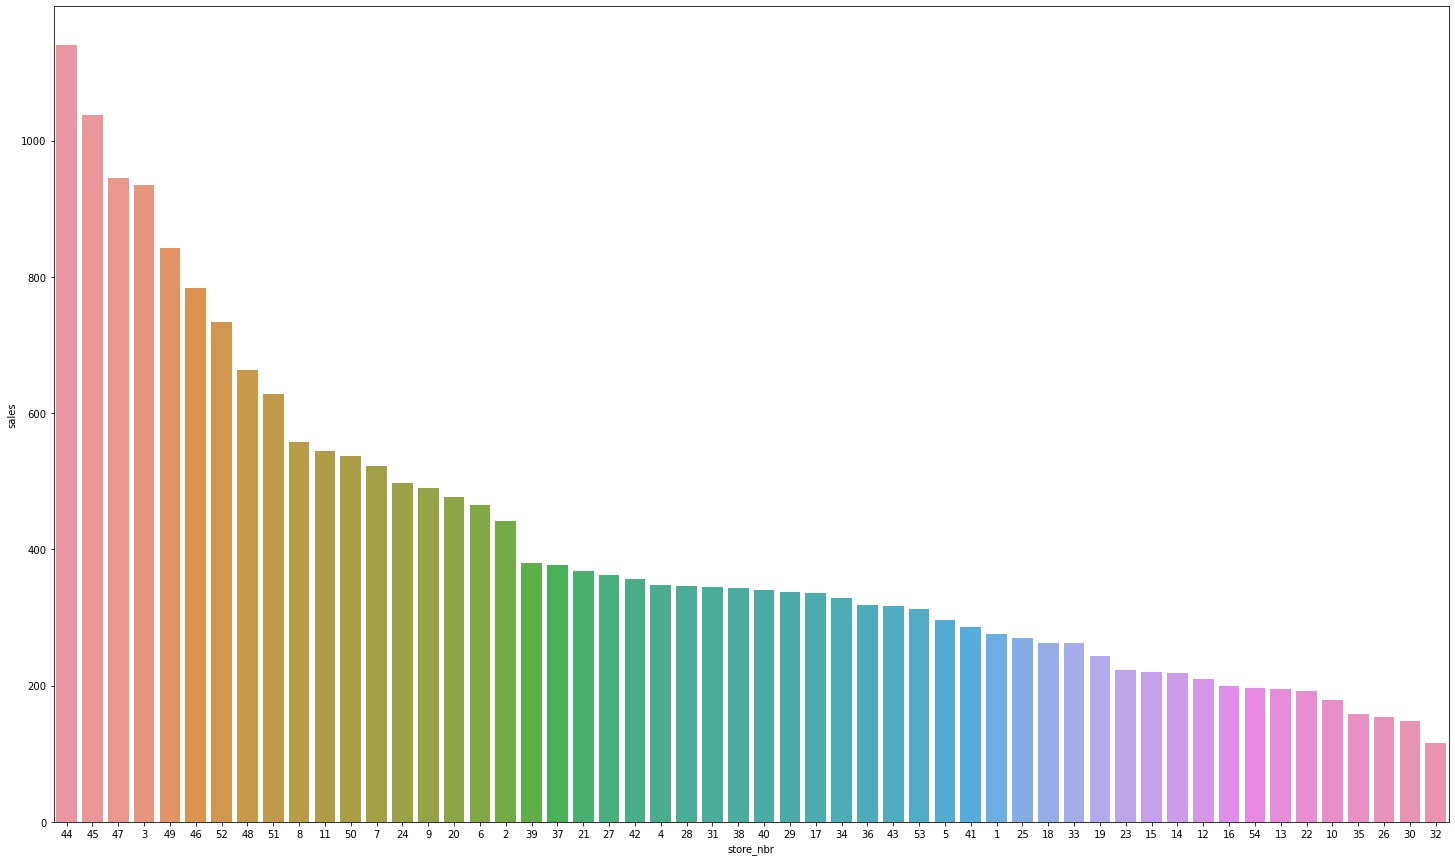

In [21]:

s=df.groupby('store_nbr')['sales'].mean().sort_values(ascending=False)
s=pd.DataFrame(s)
ax,f=plt.subplots(figsize=(25,15))
sns.barplot(x=s.index,y='sales',data=s,ax=None,ci=None,order=s.index)

In [22]:

df['city_state']=df['city']+"_"+df['state']
df['type_locale']=df['type_y']+"_"+"locale"

city_state=df[(df['store_nbr']==44)|(df['store_nbr']==45)|(df['store_nbr']==47)|(df['store_nbr']==30)|(df['store_nbr']==32)][['city_state','store_nbr']]
city_state.value_counts()

city_state        store_nbr
Guayaquil_Guayas  32           6402
Quito_Pichincha   44           6402
                  45           6402
                  47           6402
Guayaquil_Guayas  30           6303
dtype: int64

<AxesSubplot:xlabel='sales', ylabel='city_state'>

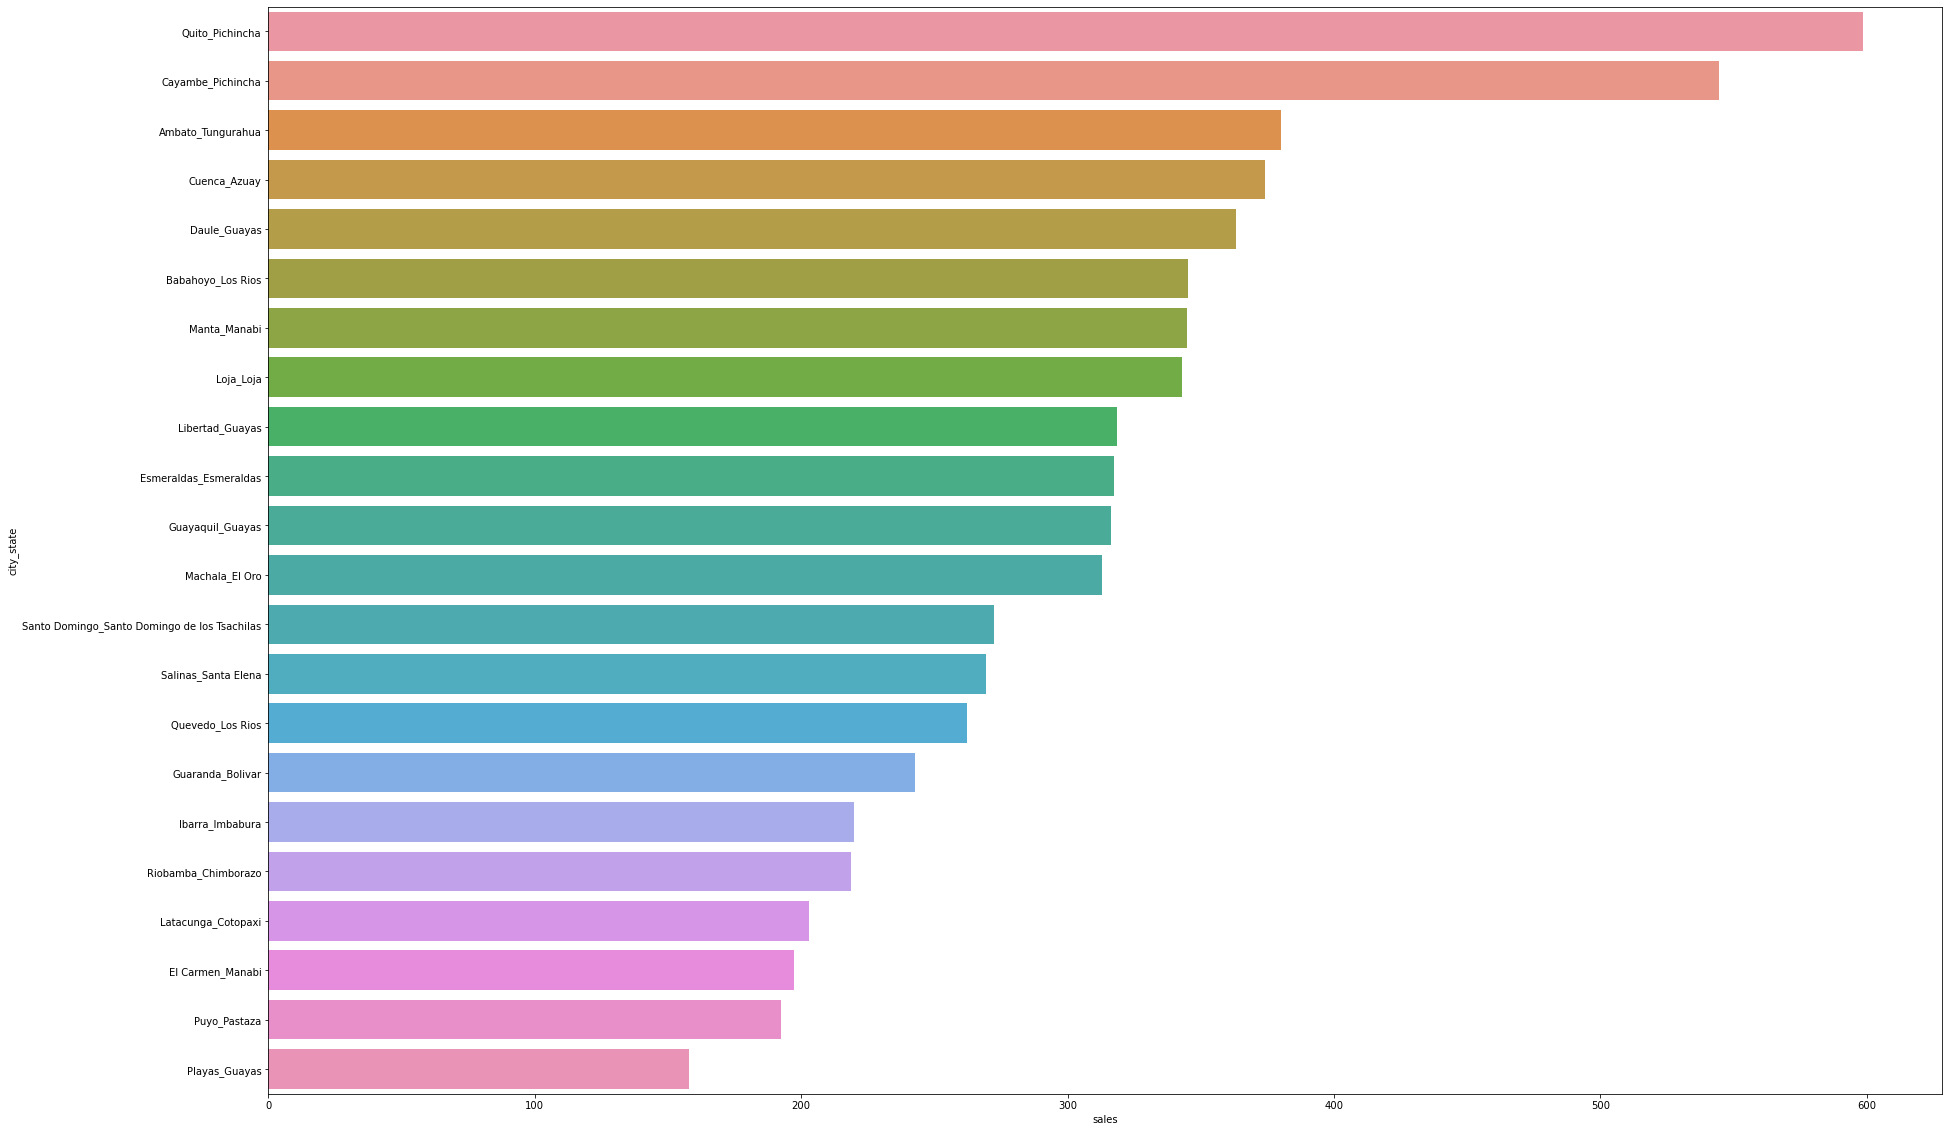

In [23]:
c=df.groupby(['city_state'])['sales'].mean().sort_values(ascending=False)
c=pd.DataFrame(c)
ax,f=plt.subplots(figsize=(30,20))
sns.barplot(x='sales',y=c.index,data=c,ax=None,ci=None)

<AxesSubplot:ylabel='sales'>

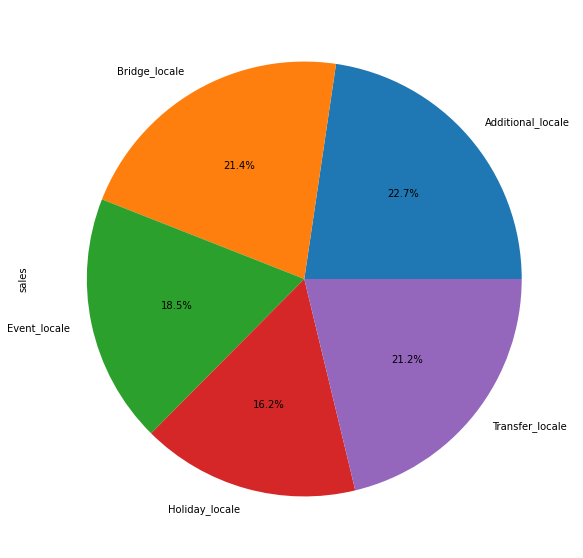

In [24]:
f,ax=plt.subplots(figsize=(20,10))
g=df.groupby(['type_locale'])['sales'].mean()

g.plot.pie(autopct='%1.1f%%',ax=None)

In [25]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.loc[:, train.columns != 'sales'], train['sales'], test_size=0.33, random_state=42)

In [26]:
X_train

,id,date,store_nbr,family,onpromotion
386049,386049,2013-08-05,40,Home,0
370005,370005,2013-07-27,40,Daily,0
1106752,1106752,2014-09-15,12,Home,1
459265,459265,2013-09-15,45,LifeStyle,0
2849710,2849710,2017-05-23,17,POULTRY,0
...,...,...,...,...,...
1692743,1692743,2015-08-10,54,DAIRY,0
2356330,2356330,2016-08-18,23,Home,0
2229084,2229084,2016-06-07,53,Tools,0
2768307,2768307,2017-04-07,33,BEVERAGES,15


In [27]:
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# one-hot encode the categorical features
cat_attribs = ['id','date','family']
full_pipeline = ColumnTransformer([('cat', OneHotEncoder(handle_unknown='ignore'), cat_attribs)], remainder='passthrough')

encoder = full_pipeline.fit(X_train)
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)
test=encoder.transform(test)
# train the model
model = XGBRegressor(n_estimators=10, max_depth=20, verbosity=2)
model.fit(X_train, y_train)

# extract the training set predictions
model.predict(X_train)
# array([7.0887003, 3.7923286, 7.0887003], dtype=float32)

# extract the test set predictions
predictions = model.predict(X_test)
# array([7.0887003, 7.0887003], dtype=float32)

[10:49:12] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 15966 extra nodes, 0 pruned nodes, max_depth=20
[10:51:07] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 18730 extra nodes, 0 pruned nodes, max_depth=20
[10:52:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 18270 extra nodes, 0 pruned nodes, max_depth=20
[10:54:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 15756 extra nodes, 0 pruned nodes, max_depth=20
[10:55:43] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 12904 extra nodes, 0 pruned nodes, max_depth=20
[10:56:28] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end

In [28]:
y_test

2483653    2576.000000
2761877       0.000000
1217988     357.354000
1231938       5.000000
528175        0.000000
              ...     
2791862      83.216000
1691971      55.404003
1611776       0.000000
1963121       0.000000
449204       93.000000
Name: sales, Length: 990294, dtype: float64

In [29]:
test1=encoder.transform(test1)

In [30]:
pred1=model.predict(X_test)
pred=pd.DataFrame(pred1)
pred.rename(columns={0:'sales'},inplace=True)
#pred.index=test1['id']
pred

,sales
0,2532.201416
1,1.370739
2,180.878098
3,16.774099
4,70.013954
...,...
990289,51.198730
990290,69.653320
990291,16.774099
990292,20.964148


In [32]:
from sklearn.metrics import mean_squared_error
from numpy import sqrt 
rms = sqrt(mean_squared_error(y_test, pred1))

In [33]:
rms

434.4013210865008

In [34]:
pred["Act"] = y_test.values

In [35]:
pred

,sales,Act
0,2532.201416,2576.000000
1,1.370739,0.000000
2,180.878098,357.354000
3,16.774099,5.000000
4,70.013954,0.000000
...,...,...
990289,51.198730,83.216000
990290,69.653320,55.404003
990291,16.774099,0.000000
990292,20.964148,0.000000


In [36]:
X_test

<990294x2012295 sparse matrix of type '<class 'numpy.float64'>'
	with 3172917 stored elements in Compressed Sparse Row format>

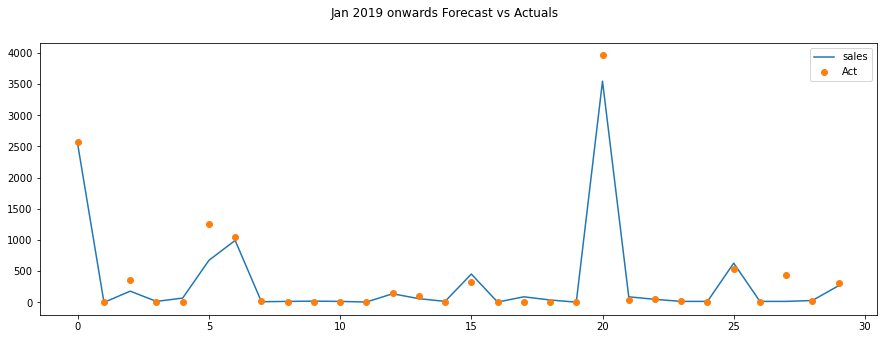

In [37]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
#df_all = pd.concat([pred, X_test], sort=False)
_ = pred[["sales","Act"]][0:30].plot(ax=ax, style=["-","o"])
#ax.set_xbound(lower=’2019–09–01', upper=’2019–10–01')
plot = plt.suptitle("Jan 2019 onwards Forecast vs Actuals")

In [ ]:
#Arima
# https://www.kaggle.com/code/rinichristy/time-series-forecast-store-sales

In [7]:
from sklearn.model_selection import train_test_split


In [3]:
holidays=pd.read_csv('holidays_events.csv')
oil=pd.read_csv('oil.csv')
stores=pd.read_csv('stores.csv')
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')
transactions=pd.read_csv('transactions.csv')

In [4]:
from random import sample

train = train.sample(n=100000)

In [8]:
train, val = train_test_split(train, test_size=0.2, random_state=1)

In [9]:
val

,id,date,store_nbr,family,sales,onpromotion
1331197,1331197,2015-01-20,10,EGGS,66.000,0
772580,772580,2014-03-11,36,HOME APPLIANCES,0.000,0
1570919,1570919,2015-06-03,36,LAWN AND GARDEN,7.000,0
1933557,1933557,2015-12-24,11,LINGERIE,5.000,0
2877097,2877097,2017-06-07,35,PERSONAL CARE,54.000,2
...,...,...,...,...,...,...
79251,79251,2013-02-14,32,HOME CARE,0.000,0
1197938,1197938,2014-11-05,21,BREAD/BAKERY,0.000,0
2120433,2120433,2016-04-07,54,HOME CARE,147.000,0
2073762,2073762,2016-03-12,45,DELI,709.196,0


In [10]:
train['date'] = pd.to_datetime(train['date'])
train['date'] = train.date.dt.to_period('D')
val['date'] = pd.to_datetime(val['date'])
val['date'] = val.date.dt.to_period('D')

In [11]:
train = train.set_index(['store_nbr', 'family', 'date']).sort_index()
val = val.set_index(['store_nbr', 'family', 'date']).sort_index()
train.head(), val.head()

(                                     id  sales  onpromotion
 store_nbr family     date                                  
 1         AUTOMOTIVE 2013-01-29   49896    2.0            0
                      2013-02-15   80190    0.0            0
                      2013-03-17  133650    1.0            0
                      2013-05-16  240570    3.0            0
                      2013-05-29  263736    3.0            0,
                                       id  sales  onpromotion
 store_nbr family     date                                   
 1         AUTOMOTIVE 2013-06-21   304722    5.0            0
                      2013-12-19   627264    0.0            0
                      2014-03-13   775170    2.0            0
                      2014-11-19  1222452    1.0            0
                      2015-02-20  1386396    0.0            0)

In [12]:
Total_sales = train.groupby('date').sum().squeeze().loc['2017']
Total_sales

,id,sales,onpromotion
date,,,
2017-01-01,106484365,17.000000,0
2017-01-02,116959512,60228.966000,465
2017-01-03,132638619,38285.776001,435
2017-01-04,119720046,42014.920000,924
2017-01-05,143239544,24669.288000,282
...,...,...,...
2017-08-11,116726869,7126.960000,308
2017-08-12,134759576,16683.186000,153
2017-08-13,113868200,17381.678000,130


In [13]:
Total_sales_test = val.drop('id', axis = 1).groupby('date').sum().squeeze().loc['2017']
Total_sales_test

,sales,onpromotion
date,,
2017-01-01,0.000,0
2017-01-02,6616.000,46
2017-01-03,19663.314,119
2017-01-04,10887.958,392
2017-01-05,635.841,22
...,...,...
2017-08-11,9684.842,51
2017-08-12,776.920,7
2017-08-13,1175.800,3


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.loc[:, train.columns != 'sales'], train['sales'], test_size=0.33, random_state=42)

predicted=23548.442282, expected=22841.594000
predicted=23027.177277, expected=38535.554000
predicted=26647.680745, expected=15897.574000
predicted=28509.311386, expected=18201.540000
predicted=24426.808120, expected=21793.029000
predicted=22077.646219, expected=16960.497000
predicted=24463.902327, expected=35079.422000
predicted=24878.641269, expected=24359.282000
predicted=22372.288795, expected=11463.434010
predicted=21332.425558, expected=12713.221000
predicted=18140.887269, expected=20498.971998
predicted=20733.545962, expected=32032.906000
predicted=25192.626026, expected=55936.281950
predicted=26704.453772, expected=41407.281010
predicted=28504.884326, expected=28369.974000
predicted=27535.426103, expected=21474.776000
predicted=27813.233896, expected=29087.408000
predicted=35229.740085, expected=17668.339000
predicted=36435.825175, expected=60130.689000
predicted=34710.650885, expected=18232.887000
predicted=32038.488485, expected=20581.915000
predicted=25304.283837, expected=2

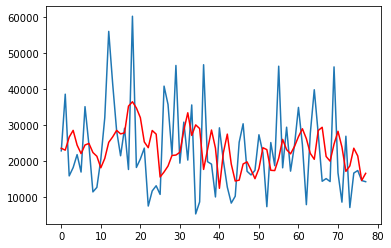

In [15]:
# #X = y_train["sales"].values
# #size = int(len(X) * 0.66)
# #train, test = X[0:size], X[size:len(X)]
# history = [x for x in y_train]
# predictions = list()
# # walk-forward validation
# from statsmodels.tsa.arima.model import ARIMA
# for t in range(len(y_test)):
#     model = ARIMA(history, order=(5,1,0))
#     model_fit = model.fit()
#     output = model_fit.forecast()
#     yhat = output[0]
#     predictions.append(yhat)
#     obs = y_test[t]
#     history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
# # evaluate forecasts
# from sklearn.metrics import mean_squared_error
# from math import sqrt
# rmse = sqrt(mean_squared_error(y_test, predictions))
# print('Test RMSE: %.3f' % rmse)
# # plot forecasts against actual outcomes
# plt.plot(y_test)
# plt.plot(predictions, color='red')
# plt.show()

X = Total_sales["sales"].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
from statsmodels.tsa.arima.model import ARIMA
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
##Arima 2
# https://www.projectpro.io/article/how-to-build-arima-model-in-python/544

In [210]:
df=pd.read_csv('train.csv')


In [211]:
df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [212]:
df.nunique()

id             3000888
date              1684
store_nbr           54
family              33
sales           379610
onpromotion        362
dtype: int64

In [213]:
df=df.groupby('date')['sales'].mean()
df=pd.DataFrame(df)

In [214]:
df

,sales
date,
2013-01-01,1.409438
2013-01-02,278.390807
2013-01-03,202.840197
2013-01-04,198.911154
2013-01-05,267.873244
...,...
2017-08-11,463.733851
2017-08-12,444.798280
2017-08-13,485.768618


In [215]:
df= df[df['sales'] != 0]

In [216]:
df

,sales
date,
2013-01-01,1.409438
2013-01-02,278.390807
2013-01-03,202.840197
2013-01-04,198.911154
2013-01-05,267.873244
...,...
2017-08-11,463.733851
2017-08-12,444.798280
2017-08-13,485.768618


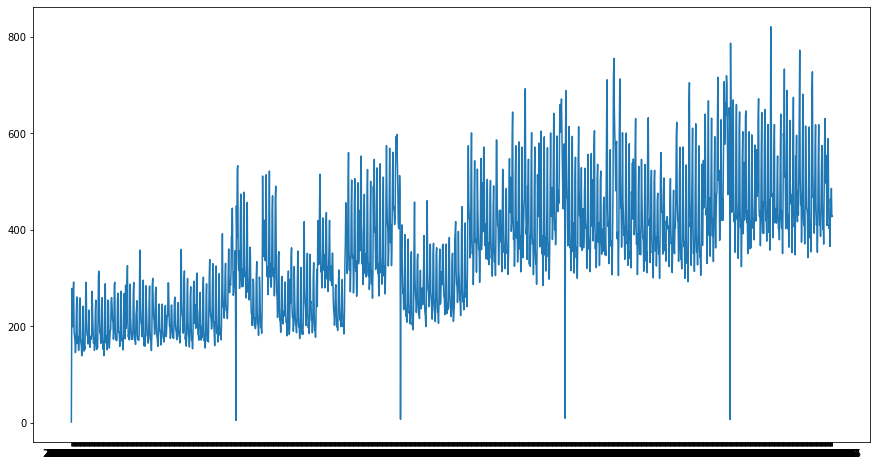

In [217]:
import matplotlib.pyplot as plt

# setting the size
plt.figure(figsize=(15,8))

# plotting the graph
plt.plot(df.index, df.sales)
plt.show()

In [218]:
df = df[["sales"]]

In [219]:
len(df)

1684

In [220]:
df

,sales
date,
2013-01-01,1.409438
2013-01-02,278.390807
2013-01-03,202.840197
2013-01-04,198.911154
2013-01-05,267.873244
...,...
2017-08-11,463.733851
2017-08-12,444.798280
2017-08-13,485.768618


In [239]:
from statsmodels.tsa.arima_model import ARIMA

arima_model = ARIMA(df.sales[0:1500],order = (5,1,0))
model = arima_model.fit()
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.sales   No. Observations:                 1499
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -8441.534
Method:                       css-mle   S.D. of innovations             67.479
Date:                Sun, 31 Jul 2022   AIC                          16897.067
Time:                        12:50:47   BIC                          16934.255
Sample:                             1   HQIC                         16910.922
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2120      0.566      0.374      0.708      -0.898       1.322
ar.L1.D.sales    -0.2918      0.022    -13.016      0.000      -0.336      -0.248
ar.L2.D.sales    -0.5586      0.022    -

In [240]:
y_pred = pd.Series(model.forecast(184)[0], index=df.sales[1500:].index)
y_true = df.sales[1500:]
print(y_pred)
print(y_true)

date
2017-02-13    510.937000
2017-02-14    476.344163
2017-02-15    437.684202
2017-02-16    426.575989
2017-02-17    459.556415
                 ...    
2017-08-11    521.226077
2017-08-12    521.438117
2017-08-13    521.650157
2017-08-14    521.862197
2017-08-15    522.074237
Length: 184, dtype: float64
date
2017-02-13    445.743228
2017-02-14    360.613461
2017-02-15    418.507494
2017-02-16    362.496216
2017-02-17    425.844957
                 ...    
2017-08-11    463.733851
2017-08-12    444.798280
2017-08-13    485.768618
2017-08-14    427.004717
2017-08-15    427.980884
Name: sales, Length: 184, dtype: float64


In [241]:
y_true.values

array([445.74322787, 360.61346076, 418.50749444, 362.49621609,
       425.84495667, 596.7423367 , 481.98491752, 425.99329964,
       402.81014423, 414.92033356, 379.11251412, 458.02328785,
       575.76387363, 435.30246239, 418.04542544, 532.75355166,
       565.94933219, 469.26216558, 495.30851643, 631.72634515,
       671.70801914, 443.40249219, 427.53464084, 438.2977901 ,
       366.94791918, 434.26223729, 561.82628171, 643.10147417,
       423.33915827, 393.37712382, 457.7002735 , 392.31659193,
       455.83994067, 583.00031771, 649.34940437, 463.76482038,
       418.97919539, 430.90954261, 376.45791809, 442.15158559,
       582.56976256, 618.1579555 , 440.01305558, 394.46910695,
       462.75700619, 357.81388384, 493.12572272, 821.0347713 ,
       638.97309702, 468.68216724, 468.91281482, 475.10174406,
       383.3106454 , 429.57475417, 554.76513466, 618.24559882,
       414.92263243, 416.01090359, 444.31106222, 413.59683793,
       415.76289946, 504.2706049 , 553.02682105, 435.41

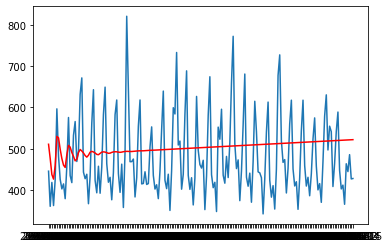

In [242]:
plt.plot(y_true.values)
plt.plot(y_pred, color='red')
plt.show()